<a href="https://colab.research.google.com/github/Henil21/Fundamental_Of_NLP_Handson-/blob/main/Fundamental_Of_NLP_HandsOn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 Text Representation and Preprocessing

In [ ]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download resources (run once)
nltk.download('punkt_tab', quiet=True) # Download punkt_tab
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text, keep_negations=True, use_lemmatization=True, min_freq=2):
    """
    Preprocess raw text into clean tokens for NLP tasks.
    """
    # 1. Cleaning
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^\w\s]", "", text)

    # 2. Lowercasing
    text = text.lower()

    # 3. Tokenization
    tokens = nltk.word_tokenize(text)

    # 4. Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]

    # 5. Handle negations
    if keep_negations:
        result = []
        skip = False
        for i in range(len(tokens)-1):
            if tokens[i] == "not":
                result.append(tokens[i] + "_" + tokens[i+1])
                skip = True
            elif skip:
                skip = False
            else:
                result.append(tokens[i])
        if not skip:
            result.append(tokens[-1])
        tokens = result

    # 6. Normalization
    if use_lemmatization:
        doc = nlp(" ".join(tokens))
        tokens = [token.lemma_ for token in doc]
    else:
        ps = PorterStemmer()
        tokens = [ps.stem(w) for w in tokens]

    # 7. Spelling correction
    tokens = [str(TextBlob(w).correct()) for w in tokens]

    # 8. Handle rare words
    freq = Counter(tokens)
    tokens = [w if freq[w] >= min_freq else "<UNK>" for w in tokens]

    return tokens

# ------------------------------
# Example with dummy data
# ------------------------------
dummy_texts = [
    "The movie was AMAZING!!! I loved it.",
    "I did not like the movie at all.",
    "What an awesome film, truly enjoyed it."
]

# Preprocess each document
preprocessed_docs = [" ".join(preprocess_text(doc)) for doc in dummy_texts]

# Bag-of-Words
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(preprocessed_docs)
print("Bag-of-Words feature names:", bow_vectorizer.get_feature_names_out())
print("Bag-of-Words matrix:\n", bow_matrix.toarray())

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_docs)
print("TF-IDF feature names:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF matrix:\n", tfidf_matrix.toarray())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Bag-of-Words feature names: ['unk']
Bag-of-Words matrix:
 [[3]
 [2]
 [4]]
TF-IDF feature names: ['unk']
TF-IDF matrix:
 [[1.]
 [1.]
 [1.]]


# Chapter 3 Classical NLP Models and Techniques

## 3.2 Part Of Speech tagging

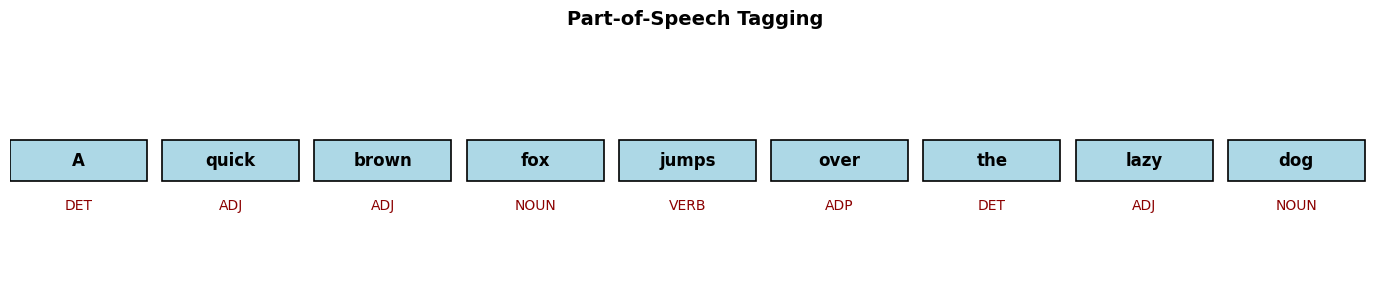

In [ ]:
import spacy
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load English model
nlp = spacy.load("en_core_web_sm")

# Input sentence
sentence = "A quick brown fox jumps over the lazy dog"
doc = nlp(sentence)

# Extract words and their POS tags
words = [token.text for token in doc]
pos_tags = [token.pos_ for token in doc]

# Create figure Using Matplotlib
plt.figure(figsize=(14, 3))
ax = plt.gca()
ax.set_xlim(0, len(words))
ax.set_ylim(-1, 2)
ax.axis("off")

# Draw each word with a box and its POS tag
for i, (word, pos) in enumerate(zip(words, pos_tags)):
    # Draw rectangle for the word
    rect = Rectangle((i, 0.2), 0.9, 0.5, facecolor="lightblue", edgecolor="black", linewidth=1.2)
    ax.add_patch(rect)
    # Add word inside the box
    plt.text(i+0.45, 0.45, word, ha="center", va="center", fontsize=12, weight="bold")
    # Add POS tag below the box
    plt.text(i+0.45, -0.1, pos, ha="center", va="center", fontsize=10, color="darkred")

plt.title("Part-of-Speech Tagging", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

## 3.3 Name Entitiy recognition

In [ ]:
# Install spaCy if not already installed
# !pip install spacy

import spacy
from spacy import displacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# Example text
text="ISRO launched Chandrayaan-3 from the Satish Dhawan Space Centre in 2023"
# Process text
doc = nlp(text)

# Print detected entities with labels
print("Named Entities, Phrases, and Labels:")
for ent in doc.ents:
    print(f"{ent.text} -> {ent.label_}")

# Visualize entities in a Jupyter Notebook or Streamlit
displacy.render(doc, style="ent", jupyter=True)


Named Entities, Phrases, and Labels:
ISRO -> ORG
the Satish Dhawan Space Centre -> ORG
2023 -> DATE


## 3.4 Syntactic Parsing and Chunking

In [ ]:
# Install spaCy if not already installed
# !pip install spacy

import spacy
from spacy import displacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# Example sentence
text = "The quick brown fox jumps over the lazy dog near the river bank."
doc = nlp(text)

# --- Dependency Parsing ---
print("Dependency Parsing (Head -> Dependent):")
for token in doc:
    print(f"{token.text:10} ({token.dep_}) --> {token.head.text}")

# Visualize dependency tree (works in Jupyter/Streamlit)
displacy.render(doc, style="dep", jupyter=True)

# --- Chunking (Noun Phrases) ---
print("\nNoun Phrases (Chunks):")
for chunk in doc.noun_chunks:
    print(chunk.text)


Dependency Parsing (Head -> Dependent):
The        (det) --> fox
quick      (amod) --> fox
brown      (amod) --> fox
fox        (nsubj) --> jumps
jumps      (ROOT) --> jumps
over       (prep) --> jumps
the        (det) --> dog
lazy       (amod) --> dog
dog        (pobj) --> over
near       (prep) --> dog
the        (det) --> bank
river      (compound) --> bank
bank       (pobj) --> near
.          (punct) --> jumps



Noun Phrases (Chunks):
The quick brown fox
the lazy dog
the river bank


In [ ]:
nltk.download('punkt_tab', quiet=True) # Download punkt_tab
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 3.5 feature Selection + Dimensionality Reduction in NLP

In [ ]:
# Hands-on Demo: Feature Selection + Dimensionality Reduction in NLP
# ---------------------------------------------------------------

import time
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


categories = ['sci.space', 'rec.autos', 'comp.graphics', 'talk.politics.misc']  # 1. Load dataset (subset for speed)
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers','footers','quotes'))

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

tfidf = TfidfVectorizer(max_features=20000, stop_words='english') # 2. TF-IDF vectorization
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)

# 3. Baseline model with TF-IDF only
clf = LogisticRegression(max_iter=1000)
start = time.time()
clf.fit(X_train_tfidf, y_train)
pred = clf.predict(X_test_tfidf)
print("\nBaseline TF-IDF only:")
print("Accuracy:", accuracy_score(y_test, pred))
print("Time:", round(time.time()-start,2), "sec")

# 4. Apply Chi-Square feature selection
k = 5000  # keep top 5000 features
chi2_selector = SelectKBest(chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train_tfidf, y_train)
X_test_chi2 = chi2_selector.transform(X_test_tfidf)

clf_chi2 = LogisticRegression(max_iter=1000)
start = time.time()
clf_chi2.fit(X_train_chi2, y_train)
pred_chi2 = clf_chi2.predict(X_test_chi2)
print("\nAfter Chi-Square feature selection (k=5000):")
print("Accuracy:", accuracy_score(y_test, pred_chi2))
print("Time:", round(time.time()-start,2), "sec")

# 5. Apply TruncatedSVD (LSA for sparse matrices)
svd = TruncatedSVD(n_components=200, random_state=42)
X_train_svd = svd.fit_transform(X_train_chi2)
X_test_svd = svd.transform(X_test_chi2)

clf_svd = LogisticRegression(max_iter=1000)
start = time.time()
clf_svd.fit(X_train_svd, y_train)
pred_svd = clf_svd.predict(X_test_svd)
print("\nAfter Chi-Square + TruncatedSVD (200 components):")
print("Accuracy:", accuracy_score(y_test, pred_svd))
print("Time:", round(time.time()-start,2), "sec")

# 6. Final detailed report
print("\nClassification Report (SVD reduced):")
print(classification_report(y_test, pred_svd, target_names=categories))


TF-IDF shape: (2607, 20000)

Baseline TF-IDF only:
Accuracy: 0.8881932021466905
Time: 2.92 sec

After Chi-Square feature selection (k=5000):
Accuracy: 0.8774597495527728
Time: 0.51 sec

After Chi-Square + TruncatedSVD (200 components):
Accuracy: 0.8631484794275492
Time: 0.5 sec

Classification Report (SVD reduced):
                    precision    recall  f1-score   support

         sci.space       0.88      0.90      0.89       280
         rec.autos       0.78      0.89      0.83       285
     comp.graphics       0.91      0.83      0.87       331
talk.politics.misc       0.90      0.82      0.86       222

          accuracy                           0.86      1118
         macro avg       0.87      0.86      0.86      1118
      weighted avg       0.87      0.86      0.86      1118



# Chapter 4 Word Embeddings

## 4.1 Word2Vec

In [ ]:
!pip install gensim
from gensim.models import Word2Vec

# Sample corpus
# (this is not how actual data would be it can be in any format and more complex than this)
sentences = [
    ['king', 'is', 'a', 'strong', 'man'],
    ['queen', 'is', 'a', 'wise', 'woman'],
    ['boy', 'is', 'a', 'young', 'man'],
    ['girl', 'is', 'a', 'young', 'woman'],
    ['prince', 'is', 'a', 'young', 'king'],
    ['princess', 'is', 'a', 'young', 'queen']
]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=1)

# View vector for a word
print(model.wv['king'])

# Find similar words
print(model.wv.most_similar('king'))


[-0.01648536  0.01859871 -0.00039532 -0.00393455  0.00920726 -0.00819063
  0.00548623  0.01387993  0.01213085 -0.01502159  0.0187647   0.00934362
  0.00793224 -0.01248701  0.01691996 -0.00430033  0.01765038 -0.01072401
 -0.01625884  0.01364912  0.00334239 -0.00439702  0.0190272   0.01898771
 -0.01954809  0.00501046  0.01231338  0.00774491  0.00404557  0.000861
  0.00134726 -0.00764127 -0.0142805  -0.00417774  0.0078478   0.01763737
  0.0185183  -0.01195187 -0.01880534  0.01952875  0.00685957  0.01033223
  0.01256469 -0.00560853  0.01464541  0.00566054  0.00574201 -0.00476074
 -0.0062565  -0.00474028]
[('man', 0.18339456617832184), ('boy', 0.1694795936346054), ('princess', 0.11257125437259674), ('girl', 0.08992855995893478), ('young', 0.08873952925205231), ('is', 0.07402092218399048), ('wise', 0.06110018119215965), ('strong', -0.029589543119072914), ('woman', -0.04407210648059845), ('queen', -0.05621429532766342)]


## 4.2 Glove

In [ ]:
# # Step 1: Download smaller GloVe file (50-dimensional)
!wget http://nlp.stanford.edu/data/glove.6B.zip

# # Step 2: Unzip (only extract the 50d file)
!unzip -j glove.6B.zip glove.6B.50d.txt
!pip install gensim
# Step 3: Convert GloVe to Word2Vec format
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input_file = 'glove.6B.50d.txt'
w2v_out= 'glove.6B.50d.word2vec.txt'

glove2word2vec(glove_input_file, w2v_out)

# Step 4: Load model
model = KeyedVectors.load_word2vec_format(w2v_out, binary=False)

# Step 5: Test similarity
print("Most similar to 'king':")
print(model.most_similar('king'))

print("\nAnalogy test — king - man + woman ≈ ?")
print(model.most_similar(positive=['king', 'woman'], negative=['man']))


/tmp/ipython-input-1435751661.py:14: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, w2v_out)


Most similar to 'king':
[('prince', 0.8236179351806641), ('queen', 0.7839043140411377), ('ii', 0.7746230363845825), ('emperor', 0.7736247777938843), ('son', 0.766719400882721), ('uncle', 0.7627150416374207), ('kingdom', 0.7542160749435425), ('throne', 0.7539913654327393), ('brother', 0.7492411136627197), ('ruler', 0.7434253692626953)]

Analogy test — king - man + woman ≈ ?
[('queen', 0.8523604273796082), ('throne', 0.7664334177970886), ('prince', 0.7592144012451172), ('daughter', 0.7473883628845215), ('elizabeth', 0.7460219860076904), ('princess', 0.7424570322036743), ('kingdom', 0.7337412238121033), ('monarch', 0.721449077129364), ('eldest', 0.7184861898422241), ('widow', 0.7099431157112122)]


## 4.3 FastText

Similar words to 'learning':
[('processing', 0.3129351735115051), ('transforming', 0.21879611909389496), ('natural', 0.199319526553154), ('language', 0.19556039571762085), ('fun', 0.1642589420080185), ('modern', 0.1615072637796402), ('is', 0.15469534695148468), ('ai', 0.14184783399105072), ('and', 0.12078704684972763), ('computers', 0.11787747591733932)]

Vector representation of 'healthcare':
[ 3.6113927e-04 -5.0463579e-05 -3.6785268e-04  1.9308964e-04
  3.3790324e-04  1.2231952e-03  1.0699792e-03  6.0719997e-04
  2.0000965e-03 -2.4436738e-03]


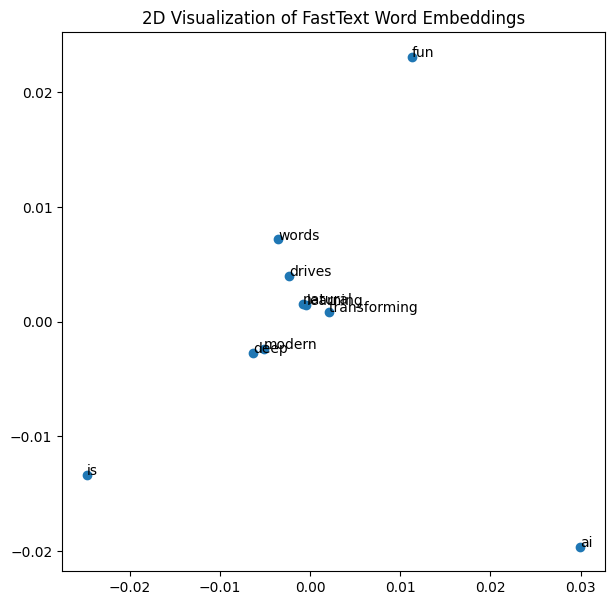

In [ ]:
# FastText Example
# ----------------

# Install gensim if not already installed
# !pip install gensim

from gensim.models import FastText
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Sample training sentences
sentences = [
    ["machine", "learning", "is", "fun"],
    ["deep", "learning", "drives", "modern", "ai"],
    ["ai", "is", "transforming", "healthcare"],
    ["natural", "language", "processing", "makes", "computers", "understand", "text"],
    ["fasttext", "handles", "rare", "and", "misspelled", "words"]
]

# 2. Train the FastText model
model = FastText(sentences, vector_size=50, window=3, min_count=1, sg=1, epochs=20)

# 3. Check similar words
print("Similar words to 'learning':")
print(model.wv.most_similar("learning"))

print("\nVector representation of 'healthcare':")
print(model.wv['healthcare'][:10])  # print first 10 dimensions

# 4. Visualize the embeddings
words = list(model.wv.index_to_key)[:10]
vectors = [model.wv[w] for w in words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.figure(figsize=(7, 7))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("2D Visualization of FastText Word Embeddings")
plt.show()
